# Text2Img


In [1]:
import torch
from diffusers import StableDiffusionXLPipeline, DPMSolverSinglestepScheduler
import matplotlib.pyplot as plt

In [2]:
# # Load model.
pipe = StableDiffusionXLPipeline.from_pretrained("sd-community/sdxl-flash", torch_dtype=torch.float16)

# Ensure sampler uses "trailing" timesteps.
pipe.scheduler = DPMSolverSinglestepScheduler.from_config(pipe.scheduler.config, timestep_spacing="trailing")

pipe = pipe.to("cuda")

# pipe = pipe.to("mps")

# Recommended if your computer has < 64 GB of RAM
pipe.enable_attention_slicing()

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/677 [00:00<?, ?B/s]

Fetching 18 files:   0%|          | 0/18 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/727 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/588 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/560 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/705 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/856 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/462 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/5.14G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.77k [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/649 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [3]:
# Image generation.
img = pipe("a happy dog, sunny day, realism", num_inference_steps=7, guidance_scale=3).images[0]

Changing scheduler {self.config} to have `lower_order_final` set to True to handle uneven amount of inference steps. Please make sure to always use an even number of `num_inference steps when using `lower_order_final=False`.


  0%|          | 0/7 [00:00<?, ?it/s]

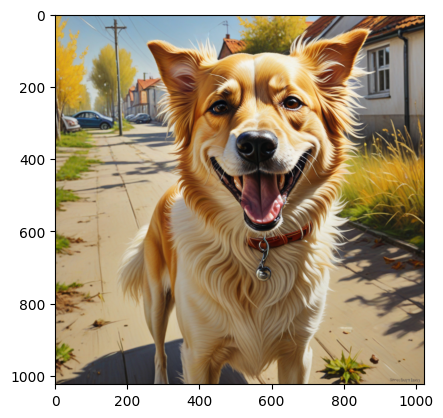

In [4]:
plt.imshow(img)

In [5]:
img.save("happy_dog.png")

# Img2Img


In [6]:
from diffusers import AutoPipelineForImage2Image
from diffusers.utils import load_image

In [10]:
pipe = AutoPipelineForImage2Image.from_pretrained("stabilityai/sdxl-turbo", torch_dtype=torch.float16, variant="fp16")

pipe = pipe.to("cuda")

# pipe = pipe.to("mps")

# Recommended if your computer has < 64 GB of RAM
pipe.enable_attention_slicing()

init_image = load_image("happy_dog.png").resize((512, 512))

prompt = "dog wizard, gandalf, lord of the rings, detailed, fantasy, cute, adorable, Pixar, Disney, 8k"

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [24]:
image = pipe(prompt, image=init_image, num_inference_steps=5, strength=0.7, guidance_scale=2.0).images[0]

# strength 원본 이미지와 얼마나 다르게 만들 것인지(0에 가까우면 원본 유지, 1에 가까우면 거의 새 이미지)
# guidance_scale 텍스트 프롬프트를 얼마나 강하게 반영할지 조절 7.5 ~ 12가 적당

  0%|          | 0/3 [00:00<?, ?it/s]

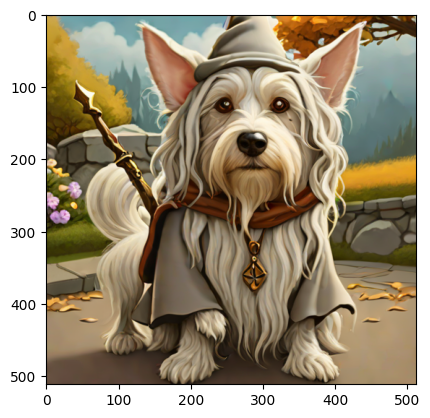

In [25]:
plt.imshow(image)

In [ ]:
image.save("wizard_dog.png")